# Lab 9: Least Squares and Linear Regression
     
MTH 308: Applied Linear Algebra <br>
Spring 2022

Lab parts: 
- Part 1: Least squares and the normal equations, Exercise 1
- Part 2: Least squares and linear regression, Exercise 2
- Part 3: Application to real data, Exercise 3

## Instructions

Run each of the coding cells. For example cells, understand the commands and check that the outputs make sense. For exercise cells, write your own code where indicated to generate the correct output.

<u>Submission:</u> Complete the following notebook in order. Once done, print the notebook and save as an HTML file. Upload your submission to the Canvas course page.

<u>Rubric:</u> 15 total points, 3 points to running example cells and saving outputs, 4 points per exercise block with correct output saved.

<u>Deadline:</u> Monday at midnight after the lab is assigned.

## Part 1: Least squares and the normal equations, Exercise 1

Here we explore the concept of a least squares by
- Finding the best approximation of a vector in a given subspace
- Deriving and exploring the normal equations

#### Vector projections and best approximation

For subspace $W$ of $\mathbb{R}^n$ with orthogonal basis $\{ \vec{u}_1, \vec{u}_2, \dots, \vec{u}_p \}$, any vector $\vec{y}$ can be projected onto $W$ via the following formula.
$$
\vec{\hat{y}} = proj_W (\vec{y}) = \frac{\vec{y}\cdot\vec{u}_1}{\vec{u}_1 \cdot \vec{u}_1} \vec{u}_1 + \frac{\vec{y}\cdot\vec{u}_2}{\vec{u}_2 \cdot \vec{u}_2} \vec{u}_2 + \dots + \frac{\vec{y}\cdot\vec{u}_p}{\vec{u}_p \cdot \vec{u}_p} \vec{u}_p
$$
This is illustrated in the below image.

<img src="attachment:capture.png" width="30%" >

It can be shown that projection $\vec{\hat{y}}$ is the best approximation of $\vec{y}$ in subspace $W$. That is,
$$
\| \vec{y} - \vec{\hat{y}} \| < \| \vec{y} - \vec{v} \|
$$
for all $\vec{v}$ in $W$ not equatl to $\vec{\hat{y}}$. See section 5.3 of the text for details.

#### Exercise 1: Computing best approximations

Consider the following vectors.
$$
\vec{y} = \left[ \begin{array}{c}
4 \\ 3 \\ 3 \\ -1
\end{array} \right], \quad
\vec{u}_1 = \left[ \begin{array}{c}
1 \\ 1 \\ 0 \\ 1
\end{array} \right], \quad
\vec{u}_2 = \left[ \begin{array}{c}
-1 \\ 3 \\ 1 \\ -2
\end{array} \right], \quad
\vec{u}_3 = \left[ \begin{array}{c}
-1 \\ 0 \\ 1 \\ 1
\end{array} \right]
$$
Let $W = Span\{ \vec{u}_1,\vec{u}_2,\vec{u}_3 \}$. Use the below coding block to show the following.
1. Create a dot product function and use it to show $\{ \vec{u}_1,\vec{u}_2,\vec{u}_3 \}$ is an orthogonal set (and hence is a basis for $W$).
2. Show $\vec{y}$ is not in subspace $W$.
3. Use your dot product function to compute $\vec{\hat{y}} = proj_W(\vec{y})$.
4. Show the resulting $\vec{\hat{y}}$ is in subspace $W$.



In [1]:
##################
# EXERCISE CELL
##################

##################
# insert your code here

library(matlib)

dotProd <- function(u, v){
    return(sum(u*v))
}

u1 <- c(1,1,0,1)
u2 <- c(-1,3,1,-2)
u3 <- c(-1,0,1,1)

print("Dot products:")
print(dotProd(u1,u2))
print(dotProd(u1,u3))
print(dotProd(u2,u3))

print("Check if Uc=y has a solution")
y <- c(4,3,3,-1)
U <- matrix(cbind(u1,u2,u3), nrow=4, byrow=FALSE)
Solve(U,y)

print("Compute yhat, the projection of y onto W")
yhat <- dotProd(y,u1)/dotProd(u1,u1)*u1+dotProd(y,u2)/dotProd(u2,u2)*u2+dotProd(y,u3)/dotProd(u3,u3)*u3
print(yhat)

print("Check if Uc=yhat has a solution")
Solve(U,yhat)


##################

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”


Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”


[1] "Dot products:"


[1] 0


[1] 0


[1] 0


[1] "Check if Uc=y has a solution"


x1      =            2 
  x2    =   0.33333333 
    x3  =  -2.33333333 
     0  =            5 


[1] "Compute yhat, the projection of y onto W"


[1] 2.000000e+00 4.000000e+00 0.000000e+00 1.110223e-16


[1] "Check if Uc=yhat has a solution"


x1      =            2 
  x2    =   0.66666667 
    x3  =  -0.66666667 
     0  =            0 


#### Least squares and the normal equations

For linear system $A \vec{x} = \vec{b}$ with matrix $A$ of dimension $m \times n$, if $A$ has many more rows than columns ($ m >> n$), there likely is no solution to this system of equations. That is, vector $\vec{b}$ is not in $Col(A)$. 

Instead of solving exactly, the best option is now finding a best approximation known as the least-squares solution. That is, we seek $\vec{\hat{x}} \in \mathbb{R}^n$ such that
$$
\| \vec{b} - A \vec{\hat{x}} \| \leq \| \vec{b} - A \vec{x} \|
$$
for all $\vec{x}$ in $\mathbb{R}^n$. This equates to solving the system $A \vec{x} = \vec{\hat{b}}$ where $\vec{\hat{b}}$ is the projection of $\vec{b}$ onto the column space of $A$. That is,
$$
\vec{\hat{b}} = proj_{Col(A)} (\vec{b})
$$
as illustrated below.

<img src="attachment:capture2.png" width="30%" >

Using the fundamental theorem of linear algebra, it can be shown that solving this least squares problem is equivalent to solving the normal equations
$$
A^T A \vec{x} = A^T \vec{b}.
$$
See section 6.5 of the text for details.

#### Exercise 1: Computing best approximations continued

Using the above vectors $\vec{y}, \vec{u}_1, \vec{u}_2, \vec{u}_3$ we will solve the below least squares problem 2 ways.
$$
U \vec{x} = \vec{y}
$$
where matrix $U = [ \vec{u}_1 ~ \vec{u}_2 ~ \vec{u}_3 ]$ and $\vec{x}$ is an unknown vector. Complete the following steps.

1. Show $U \vec{x} = \vec{y}$ has no solution and hence $\vec{y}$ is not in the column space of $U$.
2. Solve the least squares problem by first projecting $\vec{y}$ onto the column space of $U$ to get $\vec{\hat{y}}$ then solving the system
$$
U \vec{x} = \vec{\hat{y}}.
$$
3. Solve the least squares problem by solving the normal equations
$$
U^T U \vec{x} = U^T \vec{y}.
$$

Your answers for parts 2 and 3 should be the same.


In [2]:
##################
# EXERCISE CELL
##################

##################
# insert your code here
u1 <- c(1,1,0,1)
u2 <- c(-1,3,1,-2)
u3 <- c(-1,0,1,1)


print("Check if Uc=y has a solution")
y <- c(4,3,3,-1)
U <- matrix(cbind(u1,u2,u3), nrow=4, byrow=FALSE)
Solve(U,y)

print("Compute yhat, the projection of y onto W")
yhat <- dotProd(y,u1)/dotProd(u1,u1)*u1+dotProd(y,u2)/dotProd(u2,u2)*u2+dotProd(y,u3)/dotProd(u3,u3)*u3
print(yhat)

print("Check if Uc=yhat has a solution")
Solve(U,yhat)

print("Solve the normal equations")
Solve(t(U)%*%U,t(U)%*%y)



##################

[1] "Check if Uc=y has a solution"


x1      =            2 
  x2    =   0.33333333 
    x3  =  -2.33333333 
     0  =            5 


[1] "Compute yhat, the projection of y onto W"


[1] 2.000000e+00 4.000000e+00 0.000000e+00 1.110223e-16


[1] "Check if Uc=yhat has a solution"


x1      =            2 
  x2    =   0.66666667 
    x3  =  -0.66666667 
     0  =            0 


[1] "Solve the normal equations"


x1      =            2 
  x2    =   0.66666667 
    x3  =  -0.66666667 


## Part 2: Least squares and linear regression, Exercise 2

Here we explore the concept of linear regresion by
- Reformulating as a linear system and computing a best approximation via the normal equations
- Using a R package to a best fit line

#### Linear regression and fitting lines to data

When analyzing data, it is useful to find relationships between variables. In class, we discussed house sales data and examined the relationship between price of a house and size (square feet) of the house. By assuming the relationship of the data is linear, one can quantify this relationship as the slope of a line. To find such a line, a least squares problem needs to be solved.

To relate two variables $x$ and $y$ as linear equation
$$
y = \beta_0 + \beta_1 x,
$$
we need to find slope $\beta_1$ and $y$-intercept $\beta_0$ which best fits data $(x_0, y_0), \dots, (x_n, y_n)$. Graphically, this is illustrated below.

<img src="attachment:capture3.png" width="30%" >

This translates to a linear system as illustrated below.

<img src="attachment:capture4.png" width="15%" >
<img src="attachment:capture5.png" width="40%" >

See section 6.6 of the text for full details.

#### Exercise 2: Finding a best fit line

Use the below coding block to find the best fit line $y=\beta_0 + \beta_1 x$ for data
$$
(2,1), (5,2), (7,3), (8,3).
$$

You should complete the following steps.
1. Formulate matrix $X$ and vector $\vec{y}$ as above.
2. Show system $X \vec{\beta} = \vec{y}$ has no solution.
3. Find the least squares solution to $X \vec{\beta} = \vec{y}$ using the normal equations.
4. Plot your findings including the 4 data points and the resulting best fit line.


[1] "Check if X\beta = y has a solution"


x1    =  0.33333333 
  x2  =  0.33333333 
   0  =  0.33333333 
   0  =           0 


[1] "Check if X^T X\beta = X^Ty has a solution"


x1    =  0.28571429 
  x2  =  0.35714286 


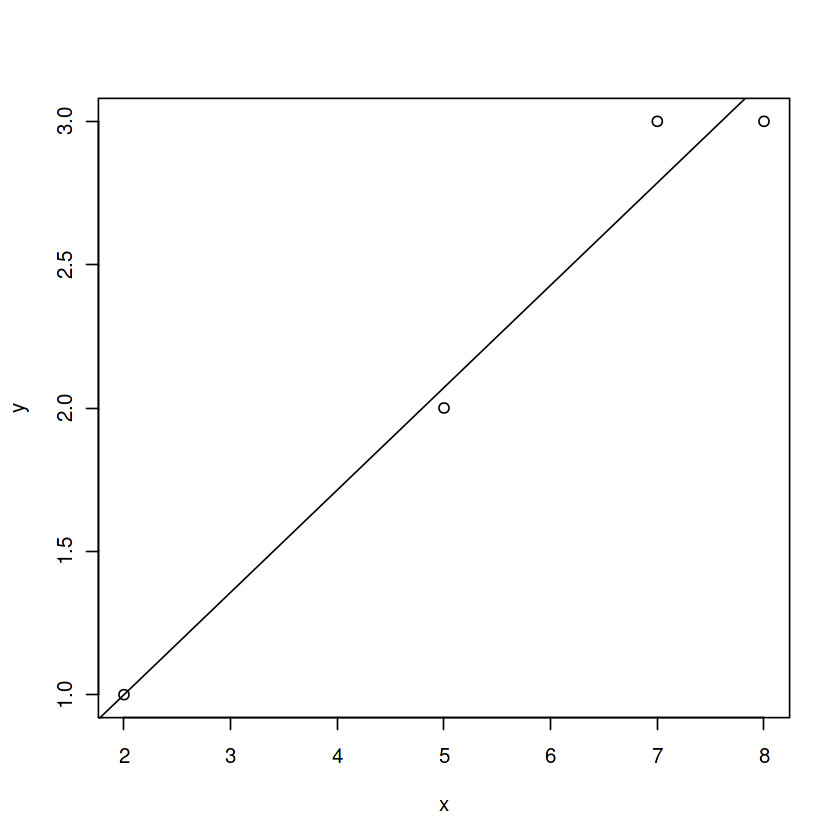

In [3]:
##################
# EXERCISE CELL
##################

##################
# insert your code here

x <- c(2,5,7,8)
y <- c(1,2,3,3)

X <- matrix(cbind(rep(1,length(x)),x), ncol=2, byrow=FALSE)

print("Check if X\beta = y has a solution")
Solve(X,y)


print("Check if X^T X\beta = X^Ty has a solution")
Solve(t(X)%*%X,t(X)%*%y)

plot(x,y)
abline(a=0.28571429 , b=0.35714286)

##################

Solving the normal equations for a best fit line is known as linear regression. There are many R packages for doing this and analyzing the resulting findings. I illustrate this below in for this exercise's data. Findings should match your solution to the least squares problem.

  x y
1 2 1
2 5 2
3 7 3
4 8 3



Call:
lm(formula = y ~ x, data = df)

Residuals:
         1          2          3          4 
 2.082e-16 -7.143e-02  2.143e-01 -1.429e-01 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.28571    0.24571   1.163   0.3649  
x            0.35714    0.04124   8.660   0.0131 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.189 on 2 degrees of freedom
Multiple R-squared:  0.974,	Adjusted R-squared:  0.961 
F-statistic:    75 on 1 and 2 DF,  p-value: 0.01307



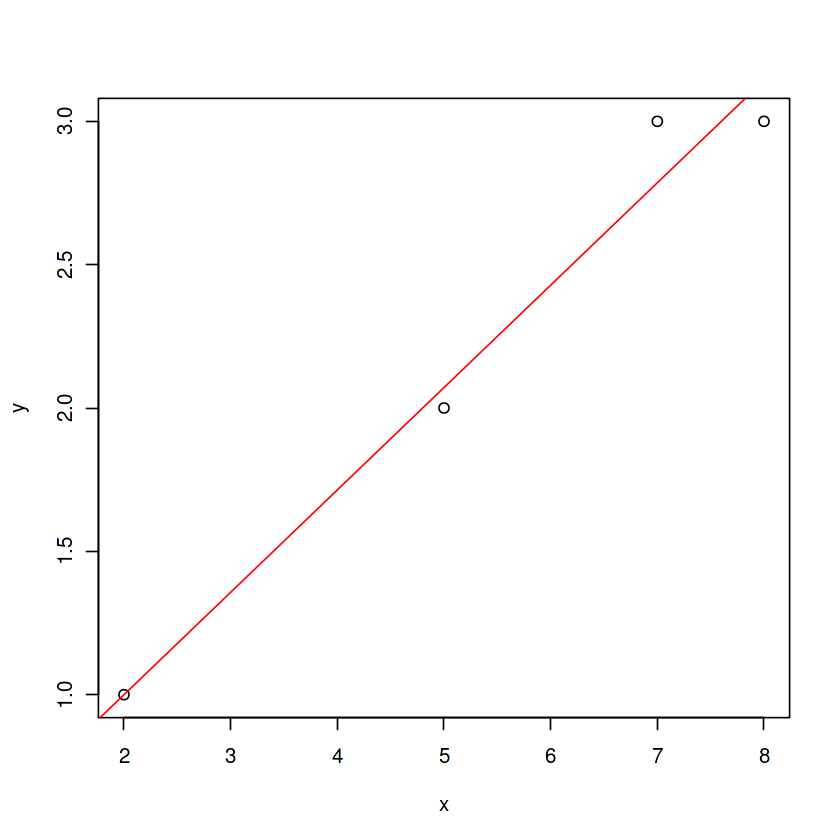

In [4]:
##################
# EAMPLE CELL
# There is no need to code anything here
##################

x <- c(2,5,7,8)
y <- c(1,2,3,3)

plot(x,y)

df <- data.frame(cbind(x,y))
print(df)

LRmodel <- lm(y ~ x, data=df)
print(summary(LRmodel))

abline(LRmodel, col='red')

## Part 3: Application to real data, Exercise 3

Here we apply least squares and linear regression to a real dataset.

#### Boston housing dataset

Here we consider the Boston dataset (see https://www.rdocumentation.org/packages/MASS/versions/7.3-54/topics/Boston and https://rstudio-pubs-static.s3.amazonaws.com/366382_50808315651c444fbccb04c60df8f041.html for details). We will examine the relationship between two variables, median value in $1000 (medv) and percent lower status as a percent (lstat). I use the below coding block to plot this data.

     crim zn indus chas   nox    rm  age    dis rad tax ptratio  black lstat
1 0.00632 18  2.31    0 0.538 6.575 65.2 4.0900   1 296    15.3 396.90  4.98
2 0.02731  0  7.07    0 0.469 6.421 78.9 4.9671   2 242    17.8 396.90  9.14
3 0.02729  0  7.07    0 0.469 7.185 61.1 4.9671   2 242    17.8 392.83  4.03
4 0.03237  0  2.18    0 0.458 6.998 45.8 6.0622   3 222    18.7 394.63  2.94
5 0.06905  0  2.18    0 0.458 7.147 54.2 6.0622   3 222    18.7 396.90  5.33
6 0.02985  0  2.18    0 0.458 6.430 58.7 6.0622   3 222    18.7 394.12  5.21
  medv
1 24.0
2 21.6
3 34.7
4 33.4
5 36.2
6 28.7


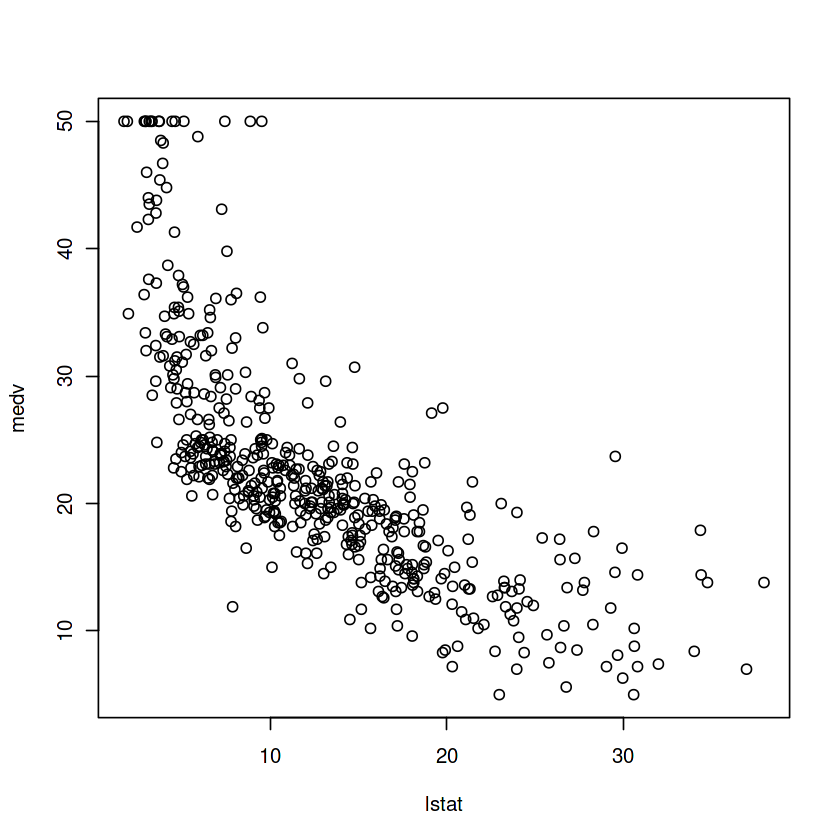

In [5]:
##################
# EXAMPLE CELL
# you do not need to code anything here
##################

library(MASS)
print(head(Boston))
plot(medv~lstat, Boston)

#### Exercise 3: Applying normal equations and linear regression to full data

The relationship between the lstat and medv variables has a somewhat linear trend. Find the best fit line to this data by completing the following.

1. Use the Boston data to create matrix $X$ and vector $\vec{y}$ of system $X\vec{\beta} = \vec{y}$ as explained in part 2.
2. Solve the normal equations to find the best fit line.
3. Plot your line with the boston dataset.
4. Use the lm() command as illustrated in part 2 to confirm your results.

[1] 506  14


[1] "Check if X^T X\beta = X^Ty has a solution"


x1    =  34.55384088 
  x2  =  -0.95004935 



Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
x           -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16



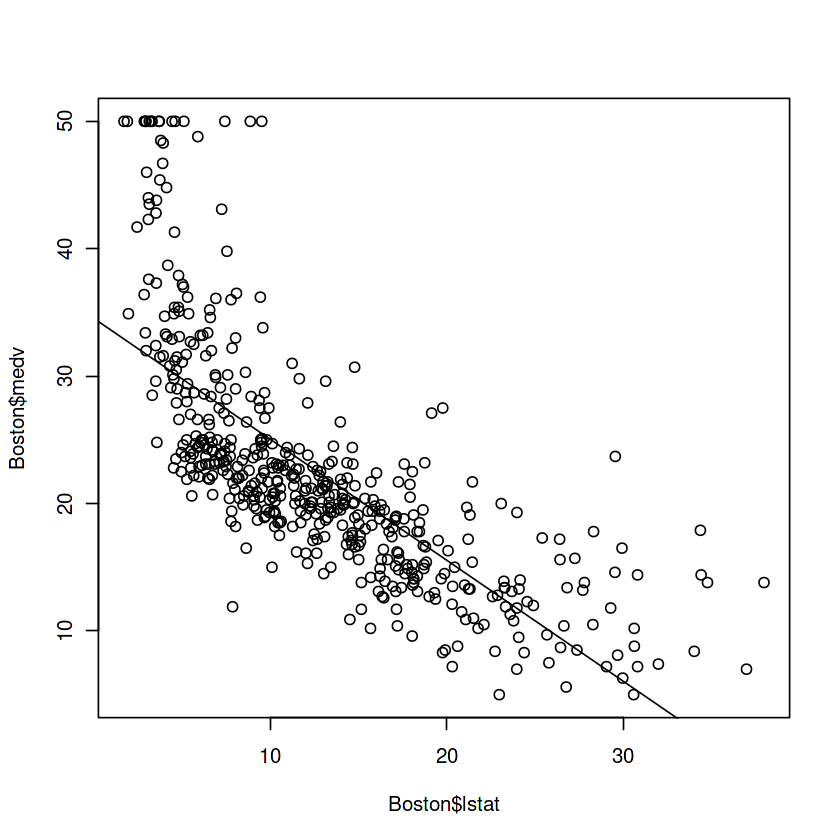

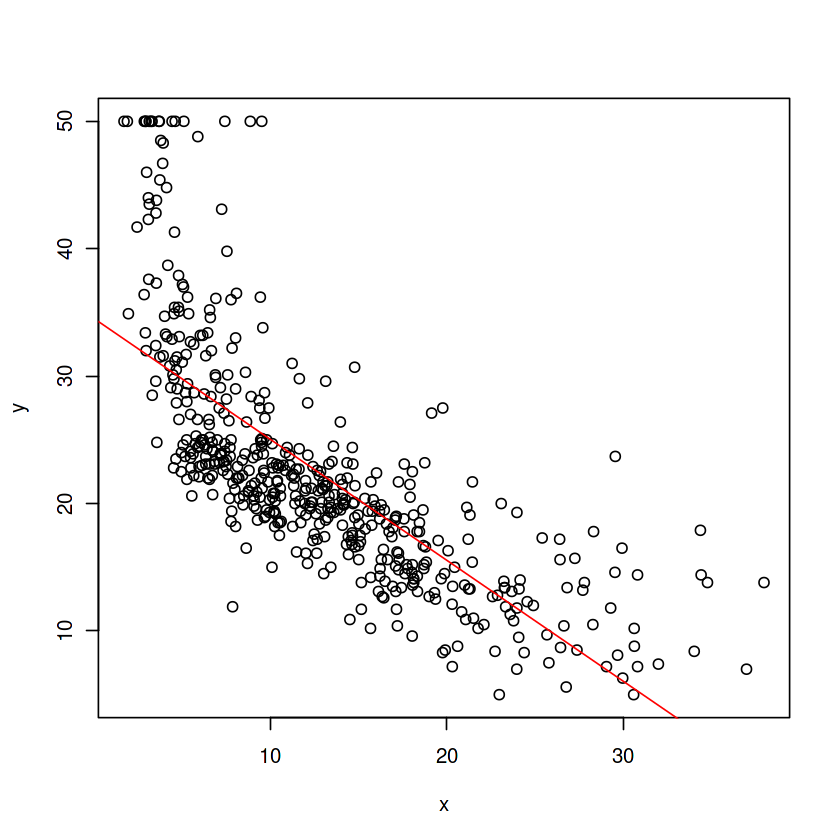

In [6]:
##################
# EXERCISE CELL
##################

##################
# INSERT YOUR CODE HERE
library(MASS)
library(matlib)

print(dim(Boston))
plot(Boston$lstat,Boston$medv)
y <- Boston$medv
X <- matrix(1, ncol=2, nrow=nrow(Boston))
X[,2] <- Boston$lstat

print("Check if X^T X\beta = X^Ty has a solution")
Solve(t(X)%*%X,t(X)%*%y)

abline(a=34.55384088 , b=-0.95004935 )

x <- X[,2]
df <- data.frame(cbind(x,y))

LRmodel <- lm(y ~ x, data=df)
print(summary(LRmodel))

plot(x,y)
abline(LRmodel, col='red')

##################